In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\coding\ML\Machine learning\student marks\StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [5]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

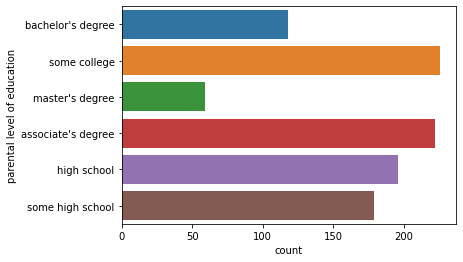

In [7]:
import seaborn as sns
sns.countplot(y= 'parental level of education',data= data)
plt.show()

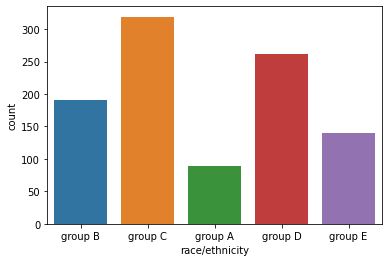

In [8]:
sns.countplot(x= 'race/ethnicity',data= data)
plt.show()

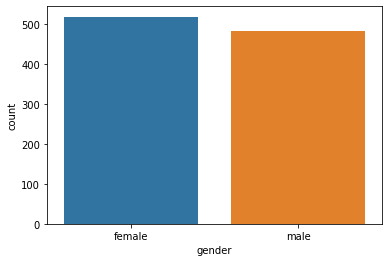

In [9]:
sns.countplot(x= 'gender',data= data)
plt.show()

In [10]:
total = ((data['math score']+data['reading score']+data['writing score'])/300)*100
total.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
dtype: float64

In [11]:
import numpy as np
data[['total']] = total

In [12]:
data['total'].shape

(1000,)

In [13]:
data['total'].head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: total, dtype: float64

In [14]:
data = pd.get_dummies(data)

In [15]:
data.corrwith(total).sort_values(ascending=False)

total                                             1.000000
reading score                                     0.970331
writing score                                     0.965667
math score                                        0.918746
lunch_standard                                    0.290064
test preparation course_completed                 0.256710
race/ethnicity_group E                            0.141050
gender_female                                     0.130861
parental level of education_bachelor's degree     0.106599
parental level of education_master's degree       0.102411
parental level of education_associate's degree    0.067414
race/ethnicity_group D                            0.058902
parental level of education_some college          0.026761
race/ethnicity_group C                           -0.030691
race/ethnicity_group B                           -0.078247
parental level of education_some high school     -0.087247
race/ethnicity_group A                           -0.1048

In [16]:
x = data.drop('total',axis=1)

In [17]:
y = data[['total']]


In [18]:
y.head()

,total
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [20]:
x_train.shape

(800, 20)

In [27]:
y_train.head()

,total
40,56.666667
977,61.666667
829,58.333333
973,58.333333
874,55.333333


In [22]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [23]:
DTR_predict = DTR.predict(x_test)

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(DTR_predict, y_test)

TypeError: estimator should be an estimator implementing 'fit' method, array([ 64.        ,  80.33333333,  64.        ,  45.        ,
        61.33333333,  70.        ,  76.33333333,  63.33333333,
        52.66666667,  58.66666667,  65.66666667,  79.33333333,
        68.        ,  92.66666667,  80.66666667,  52.33333333,
        74.66666667,  53.66666667,  52.        ,  69.33333333,
        68.        ,  74.33333333,  50.33333333,  73.33333333,
        63.66666667,  56.66666667,  45.        ,  55.33333333,
        59.        ,  62.66666667,  78.        ,  83.66666667,
        64.66666667,  60.        ,  90.33333333,  52.33333333,
        92.        ,  38.33333333,  86.33333333,  83.        ,
        87.33333333,  41.        ,  94.        ,  57.33333333,
        67.        ,  44.66666667,  83.        ,  51.33333333,
        52.66666667,  82.        ,  70.33333333,  49.        ,
        86.66666667,  55.33333333,  74.33333333,  82.        ,
        90.        ,  68.        ,  46.33333333,  46.33333333,
        39.66666667,  81.33333333,  31.33333333,  70.        ,
        84.66666667,  77.33333333,  65.        ,  46.        ,
        61.66666667,  57.33333333,  77.        ,  78.33333333,
        75.33333333,  57.33333333,  54.66666667,  59.33333333,
        68.33333333,  74.        ,  39.66666667,  74.        ,
        52.66666667,  59.        ,  71.33333333,  57.33333333,
        79.33333333,  71.        ,  68.        ,  74.66666667,
        91.66666667,  84.        ,  68.        ,  57.33333333,
        66.        ,  62.        ,  82.33333333,  60.33333333,
        37.66666667,  86.33333333,  52.66666667,  78.66666667,
        96.33333333,  60.        ,  73.33333333,  71.33333333,
        78.66666667,  58.66666667,  60.        ,  77.66666667,
        73.66666667,  58.66666667,  52.66666667,  61.33333333,
        71.        ,  85.        ,  73.33333333,  61.        ,
        78.66666667,  90.33333333,  89.33333333,  90.33333333,
        63.33333333,  60.66666667,  73.33333333,  71.        ,
        80.66666667,  87.33333333,  71.        ,  75.        ,
        18.33333333,  77.        ,  52.        ,  71.66666667,
        71.33333333,  58.33333333,  99.66666667,  64.33333333,
        85.        ,  71.66666667,  50.66666667,  68.33333333,
        43.33333333,  46.        ,  53.        ,  78.        ,
        69.66666667,  78.66666667,  68.33333333,  85.        ,
        75.        ,  48.33333333,  82.33333333,  69.        ,
        90.33333333,  66.66666667,  91.66666667,  74.33333333,
        67.33333333,  69.33333333,  80.33333333,  54.66666667,
        75.66666667,  53.        ,  76.33333333,  68.66666667,
        86.33333333,  68.        ,  61.33333333,  77.        ,
        71.        ,  79.66666667,  81.66666667,  70.        ,
        49.        ,  85.66666667,  78.33333333,  85.        ,
        62.        ,  69.        ,  69.        ,  52.33333333,
        64.        ,  76.        ,  56.33333333,  71.        ,
        68.33333333,  80.66666667,  69.33333333,  53.33333333,
        78.33333333,  68.        ,  78.66666667,  64.33333333,
        77.        , 100.        ,  80.33333333,  56.66666667,
        64.66666667,  26.        ,  50.        ,  99.66666667]) was passed

In [29]:
from sklearn.metrics import mean_squared_error
score= mean_squared_error(y_test, DTR_predict)

In [30]:
score

2.9727777777777784